---
title: "Activity 5.1"
format:
  html:
    embed-resources: true
    code-fold: true
execute:
  echo: true
  warning: false
  message: false
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
# Code Here
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
!pip install palmerpenguins
from palmerpenguins import load_penguins

In [ ]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [ ]:
pd.concat([penguins, pd.get_dummies(penguins['species'])], axis=1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,True,False,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,True,False,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,True,False,False
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,True,False,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,False,True,False
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,False,True,False
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,False,True,False
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,False,True,False


In [ ]:
pd.get_dummies(penguins)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


MAKE SURE YOU DONT MAKE DUMMIES FOR THE QUANT VARIABLES -- easy to do if its in dataframe form I think?

In [ ]:
# Dummy variables, saying 1,0,0 is it is the first species, not the second or third
enc = OneHotEncoder(handle_unknown='ignore')

enc_fitted=enc.fit(penguins)
enc_fitted.transform(penguins).todense()


matrix([[1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
# Normalizing it by taking if it is bigger or smaller than mean (0) then looking at SD -- not needed for the problem underneath though
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler_fitted = scaler.fit(penguins[['bill_length_mm']])
scaler_fitted.transform(penguins[['bill_length_mm']])

array([[-0.88449874],
       [-0.81112573],
       [-0.66437972],
       [        nan],
       [-1.32473679],
       [-0.84781224],
       [-0.92118525],
       [-0.86615549],
       [-1.80166135],
       [-0.35254443],
       [-1.12296102],
       [-1.12296102],
       [-0.5176337 ],
       [-0.976215  ],
       [-1.70994508],
       [-1.34308004],
       [-0.95787175],
       [-0.26082817],
       [-1.74663159],
       [ 0.38118565],
       [-1.12296102],
       [-1.14130427],
       [-1.47148281],
       [-1.04958801],
       [-0.9395285 ],
       [-1.58154232],
       [-0.60934996],
       [-0.62769321],
       [-1.10461777],
       [-0.62769321],
       [-0.81112573],
       [-1.23302053],
       [-0.81112573],
       [-0.5543202 ],
       [-1.37976655],
       [-0.86615549],
       [-0.9395285 ],
       [-0.31585793],
       [-1.15964752],
       [-0.75609598],
       [-1.3614233 ],
       [-0.57266346],
       [-1.45313956],
       [ 0.03266386],
       [-1.26970704],
       [-0

,bill_length_mm,bill_depth_mm,pred_degree_1,pred_degree_2,pred_degree_3,pred_degree_10
0,39.1,18.7,17.561136,17.484121,17.763289,18.385233
1,39.5,17.4,17.527128,17.392292,17.688565,18.263916
2,40.3,18.0,17.459111,17.223194,17.532171,17.959386
4,36.7,19.3,17.765187,18.136996,18.128998,18.487002
5,39.3,20.6,17.544132,17.437600,17.726273,18.327503


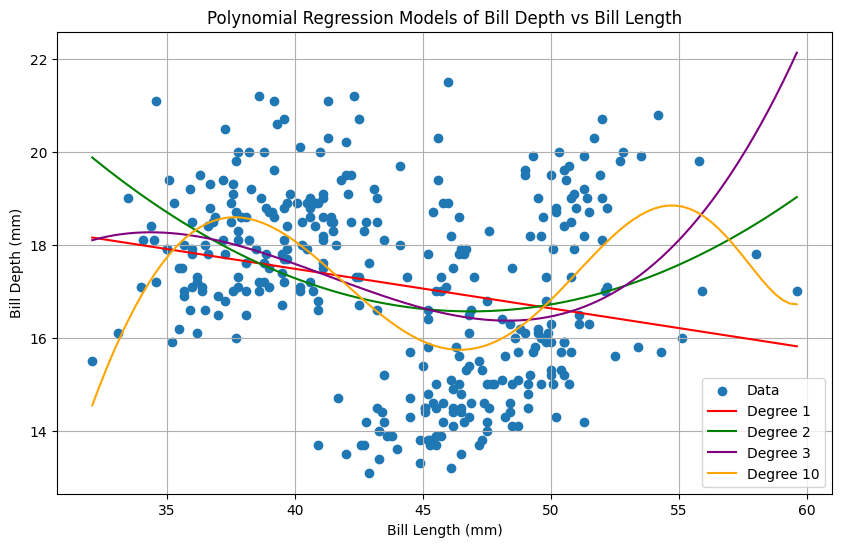

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = penguins[['bill_length_mm', 'bill_depth_mm']].dropna().copy() # Use .copy() to avoid SettingWithCopyWarning

X = data[['bill_length_mm']]
y = data['bill_depth_mm']

# Simple linear regression (degree 1)
model_degree_1 = LinearRegression()
model_degree_1.fit(X, y)
data['pred_degree_1'] = model_degree_1.predict(X)

# Quadratic model (degree 2)
X_degree_2 = pd.concat([X, X**2], axis=1)
model_degree_2 = LinearRegression()
model_degree_2.fit(X_degree_2, y)
# To predict for plotting a smooth curve, we need a range of X values and their squares
X_plot = pd.DataFrame({'bill_length_mm': np.linspace(X.min().iloc[0], X.max().iloc[0], 100)})
X_plot_degree_2 = pd.concat([X_plot, X_plot**2], axis=1)
data['pred_degree_2'] = model_degree_2.predict(pd.concat([X, X**2], axis=1))


# Cubic model (degree 3)
X_degree_3 = pd.concat([X, X**2, X**3], axis=1)
model_degree_3 = LinearRegression()
model_degree_3.fit(X_degree_3, y)
# To predict for plotting a smooth curve, we need a range of X values and their powers
X_plot_degree_3 = pd.concat([X_plot, X_plot**2, X_plot**3], axis=1)
data['pred_degree_3'] = model_degree_3.predict(pd.concat([X, X**2, X**3], axis=1))


# Degree 10 polynomial model
X_degree_10 = pd.concat([X] + [X**i for i in range(2, 11)], axis=1)
model_degree_10 = LinearRegression()
model_degree_10.fit(X_degree_10, y)
# To predict for plotting a smooth curve, we need a range of X values and their powers
X_plot_degree_10 = pd.concat([X_plot] + [X_plot**i for i in range(2, 11)], axis=1)
data['pred_degree_10'] = model_degree_10.predict(pd.concat([X] + [X**i for i in range(2, 11)], axis=1))


# Display the updated DataFrame with predictions
display(data.head())

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(data['bill_length_mm'], data['bill_depth_mm'], label='Data')
plt.plot(X_plot, model_degree_1.predict(X_plot), color='red', label='Degree 1')
plt.plot(X_plot, model_degree_2.predict(X_plot_degree_2), color='green', label='Degree 2')
plt.plot(X_plot, model_degree_3.predict(X_plot_degree_3), color='purple', label='Degree 3')
plt.plot(X_plot, model_degree_10.predict(X_plot_degree_10), color='orange', label='Degree 10')

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Polynomial Regression Models of Bill Depth vs Bill Length')
plt.legend()
plt.grid(True)
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

It looks like the first model defintely underfits as none of the true values are actyally very close to the line that it made. You could also say the same about the second model as again those true values deviate from the expected line a lot

I would say the third model overfits with so many curves going up and down. To many sharp truns with a total of 10 degrees!

The best is 3, as it finds a nice balence in between over and under fitting!